# SI 618 - Homework #2: More Data Manipulation

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

# Background
You're a Data Science Consultant for an eCommerce retail company, they've asked you to analyze their sales database. Unfortunately, they did nothing to prepare or clean their data, only exporting their 3 database tables as JSON files. It's up to you to clean their data, analyze it and answer questions to help drive business value!

### The below files have been provided:
- invoices.json
- items.json
- purchases.json

### They provided this data dictionary:

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.  
**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
**Description:** Product (item) name. Nominal.   
**Quantity:** The quantities of each product (item) per transaction. Numeric.  
**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.  
**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.  
**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
**Country:** Country name. Nominal, the name of the country where each customer resides.  

### A few notes from the company:
* If the InvoiceNo starts with the letter 'c', it indicates a cancellation. When conducting this analysis we only want to analyze invoices that were shipped. (ie. not canceled)
* The datasets should be able to be merged, each row in the invoice table corresponds to multiple rows in the purchases table.
* To find out the description or unit cost of an item in the purchase table, the StockCode should be used to match up the product in the items table. 
* They mentioned that they've been having a difficult time lately joining the items and purchases table, maybe there's something wrong with the columns?

# Answer the questions below.
- Write your Python code that can answer the following questions, 
- and explain **ALL** your answers in plain English. 

In [362]:
MY_UNIQNAME = 'tabbie'

### <span style="color:magenta"> Q1. [5 points] Describe the dataset. </span>
1. Load the data. 
1. How many total invoices have been placed?
1. How many unique customers are there?
1. What the total number of unique items?
1. Are there any columns with null values?
1. Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

In [363]:
import numpy as np
import pandas as pd
invoices = pd.read_json('618_homework_02/invoices.json')
items = pd.read_json('618_homework_02/items.json')
purchases = pd.read_json('618_homework_02/purchases.json')

In [364]:
invoices.head()

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850.0,United Kingdom
1,536366,12/1/10 8:28,17850.0,United Kingdom
2,536367,12/1/10 8:34,13047.0,United Kingdom
3,536368,12/1/10 8:34,13047.0,United Kingdom
4,536369,12/1/10 8:35,13047.0,United Kingdom


In [365]:
items.head()

,StockCode,Description,UnitPrice
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,71053,WHITE METAL LANTERN,3.39
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39


In [366]:
purchases.head()

,InvoiceNo,StockCodeSC,Quantity
0,536365,SC85123A,6
1,536365,SC71053,6
2,536365,SC84406B,8
3,536365,SC84029G,6
4,536365,SC84029E,6


In [367]:
total_invoices = invoices.dropna().InvoiceNo.value_counts().sum()
total_invoices

22221

The total number of invoices placed are 22221.

In [368]:
unique_customer = invoices.drop_duplicates('CustomerID', keep = 'first')
len(unique_customer.CustomerID.value_counts())

4372

The number of unique customers are 4372.

In [369]:
unique_items = items[['StockCode', 'Description']].dropna().drop_duplicates(subset=['Description'])
unique_items.StockCode.value_counts().sum()

3753

The total number of unique items are 3753. 

In [370]:
null_invoices = invoices.isnull().sum()
null_invoices

InvoiceNo         0
InvoiceDate       0
CustomerID     3722
Country           0
dtype: int64

The column containing null values in invoices dataframe is CustomerID.

In [371]:
null_items = items.isnull().sum()
null_items

StockCode        0
Description    176
UnitPrice        0
dtype: int64

The column containing null values in items dataframe is Description.

In [372]:
null_purchases = purchases.isnull().sum()
null_purchases

InvoiceNo      0
StockCodeSC    0
Quantity       0
dtype: int64

The are no columns in purchases dataframe containing null values.

In [373]:
cdf = invoices.merge(purchases, on = 'InvoiceNo')
cdf

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCodeSC,Quantity
0,536365,12/1/10 8:26,17850.0,United Kingdom,SC85123A,6
1,536365,12/1/10 8:26,17850.0,United Kingdom,SC71053,6
2,536365,12/1/10 8:26,17850.0,United Kingdom,SC84406B,8
3,536365,12/1/10 8:26,17850.0,United Kingdom,SC84029G,6
4,536365,12/1/10 8:26,17850.0,United Kingdom,SC84029E,6
...,...,...,...,...,...,...
545251,581587,12/9/11 12:50,12680.0,France,SC22613,12
545252,581587,12/9/11 12:50,12680.0,France,SC22899,6
545253,581587,12/9/11 12:50,12680.0,France,SC23254,4
545254,581587,12/9/11 12:50,12680.0,France,SC23255,4


In [374]:
cdf_final = cdf.join(items)
cdf_final

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCodeSC,Quantity,StockCode,Description,UnitPrice
0,536365,12/1/10 8:26,17850.0,United Kingdom,SC85123A,6,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,536365,12/1/10 8:26,17850.0,United Kingdom,SC71053,6,71053,WHITE METAL LANTERN,3.39
2,536365,12/1/10 8:26,17850.0,United Kingdom,SC84406B,8,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,536365,12/1/10 8:26,17850.0,United Kingdom,SC84029G,6,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,536365,12/1/10 8:26,17850.0,United Kingdom,SC84029E,6,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39
...,...,...,...,...,...,...,...,...,...
545251,581587,12/9/11 12:50,12680.0,France,SC22613,12,NaN,NaN,NaN
545252,581587,12/9/11 12:50,12680.0,France,SC22899,6,NaN,NaN,NaN
545253,581587,12/9/11 12:50,12680.0,France,SC23254,4,NaN,NaN,NaN
545254,581587,12/9/11 12:50,12680.0,France,SC23255,4,NaN,NaN,NaN


First merge the invoices and purchases on the common column InvoiceNo. Assign this dataframe to a variable. Then join this variable with the items dataframe as there is no common column between both the dataframes.

### <span style="color:magenta"> Q2. [10 points] Invoice Analysis </span>
1. For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.
2. Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.
3. Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.

_Hint: For 2.2, you may need to join two datasets together to answer the question._

In [375]:
total_invoices_customer1 = invoices.filter(['CustomerID', 'InvoiceNo'], axis = 1)
total_invoices_customer1

,CustomerID,InvoiceNo
0,17850.0,536365
1,17850.0,536366
2,13047.0,536367
3,13047.0,536368
4,13047.0,536369
...,...,...
25938,13777.0,581583
25939,13777.0,581584
25940,15804.0,581585
25941,13113.0,581586


In [376]:
total_invoices_customer2 = total_invoices_customer1.dropna()
total_invoices_customer2

,CustomerID,InvoiceNo
0,17850.0,536365
1,17850.0,536366
2,13047.0,536367
3,13047.0,536368
4,13047.0,536369
...,...,...
25938,13777.0,581583
25939,13777.0,581584
25940,15804.0,581585
25941,13113.0,581586


In [377]:
total_invoices_customer = total_invoices_customer2.pivot_table(index = ['CustomerID'], aggfunc= 'size').sort_values(ascending = False)
total_invoices_customer.head(15)

CustomerID
14911.0    249
12748.0    225
17841.0    169
14606.0    130
15311.0    118
13089.0    118
12971.0     89
14527.0     86
13408.0     81
14646.0     77
16029.0     76
16422.0     75
14156.0     66
13798.0     63
18102.0     62
dtype: int64

The top 10 CustomerIDs of the customers along with their total invoices placed are as follows :
14911.0  -  249,
12748.0  -  225,
17841.0  -  169,
14606.0  -  130,
15311.0  -  118,
13089.0  -  118,
12971.0  -   89,
14527.0  -   86,
13408.0  -   81,
14646.0  -   77.

In [378]:
combined_df = invoices.merge(purchases,how='right')
combined_df_clean = combined_df.dropna()
combined_df_clean

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCodeSC,Quantity
0,536365,12/1/10 8:26,17850.0,United Kingdom,SC85123A,6
1,536365,12/1/10 8:26,17850.0,United Kingdom,SC71053,6
2,536365,12/1/10 8:26,17850.0,United Kingdom,SC84406B,8
3,536365,12/1/10 8:26,17850.0,United Kingdom,SC84029G,6
4,536365,12/1/10 8:26,17850.0,United Kingdom,SC84029E,6
...,...,...,...,...,...,...
545251,581587,12/9/11 12:50,12680.0,France,SC22613,12
545252,581587,12/9/11 12:50,12680.0,France,SC22899,6
545253,581587,12/9/11 12:50,12680.0,France,SC23254,4
545254,581587,12/9/11 12:50,12680.0,France,SC23255,4


In [379]:
total_quan_customer1 = combined_df_clean.filter(['CustomerID','Quantity'], axis= 1)
total_quan_customer1

,CustomerID,Quantity
0,17850.0,6
1,17850.0,6
2,17850.0,8
3,17850.0,6
4,17850.0,6
...,...,...
545251,12680.0,12
545252,12680.0,6
545253,12680.0,4
545254,12680.0,4


In [380]:
tot_quan = combined_df_clean.groupby("CustomerID").Quantity.sum().sort_values(ascending = False)
tot_quan.head(15)

CustomerID
14646.0    196719
14911.0     77674
12415.0     77242
17450.0     69029
17511.0     65886
18102.0     64122
13694.0     61803
14298.0     58021
14156.0     57025
16684.0     49390
15311.0     37720
16422.0     32592
17404.0     32324
16333.0     32184
16029.0     32148
Name: Quantity, dtype: int64

The top 10 customers with total quantity of items ordered are as follows: 
14646.0  -  196719,
14911.0  -   77674,
12415.0  -   77242,
17450.0  -   69029,
17511.0  -   65886,
18102.0  -   64122,
13694.0  -   61803,
14298.0  -   58021,
14156.0  -   57025,
16684.0  -   49390.

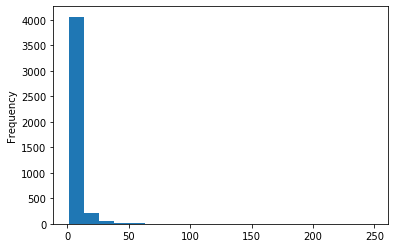

In [381]:
total_invoices_customer.plot.hist(bins= 20)

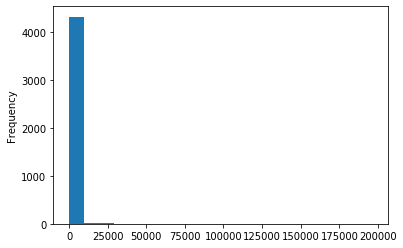

In [382]:
tot_quan.plot.hist(bins= 20)

Looking at the above data and the histograms, it is not evident that if a customer has more number of invoices then the total quantity os items is also more. 

### <span style="color:magenta"> Q3. [10 points] Item Analysis </span>
1. What is the average item-unit price? 
1. What % of items are under $20?
1. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram? 

In [383]:
average_item_unit_price = round(items.UnitPrice.mean(), 3)
average_item_unit_price

6.905

In [384]:
median_item_unit_price = round(items.UnitPrice.median(), 3)
median_item_unit_price

2.51

In [385]:
items_under20 = len(items[(items.UnitPrice < 20.00)])
items_under20

4004

In [386]:
len(items)

4070

In [387]:
round((4004 / 4070)*100, 2)

98.38

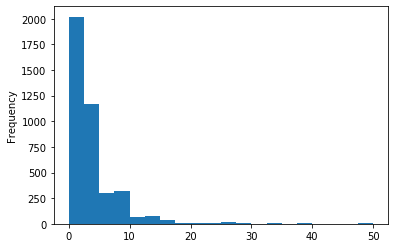

In [388]:
items.UnitPrice.plot.hist(range = (0, 50), bins = 20)

In [389]:
items.UnitPrice.min()

0.0

In [390]:
items.UnitPrice.max()

11062.06

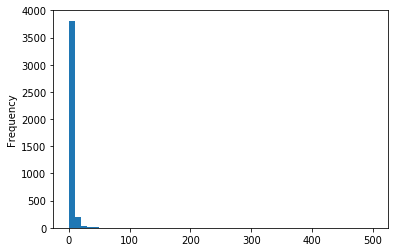

In [391]:
items.UnitPrice.plot.hist(range = (0, 500), bins = 50)

Notice that most of the values of UnitPrice are between 0-100 range and therefore the first histogram with the x-axis range is the choice for observation. The histogram is positively skewed and therefore shows maximum number of items are of UnitPrice between 0-10 range with the highest being between 0-2 on the x-axis. 

### <span style="color:magenta"> Q4. [25 points] Order Trends </span>
1. What are the top 10 most ordered items? Describe them, do you see any trends?  
1. What are the top 5 invoices that generated the most revenue? (Revenue is calculated by marking up the unit price by 25%.) 
1. Do the top invoices contain any of the top 10 most ordered items?

_Hint: When calculating the revenue we suggest adding a new column on the dataframe._

In [392]:
ordered_items1 = combined_df_clean.groupby('StockCodeSC').Quantity.sum()
ordered_items = ordered_items1.sort_values(ascending= False).head(15)
ordered_items

StockCodeSC
SC84077     53264
SC22197     48879
SC85099B    45190
SC84879     35366
SC85123A    34330
SC21212     33425
SC23084     27094
SC22492     25881
SC22616     25333
SC21977     24178
SC17003     22960
SC22178     22026
SC15036     21144
SC21915     20948
SC22386     19829
Name: Quantity, dtype: int64

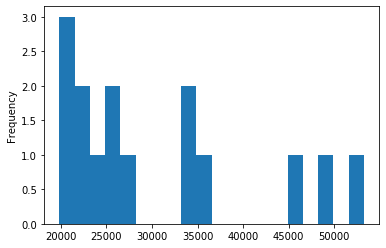

In [393]:
ordered_items.plot.hist(bins = 20)

The above histogram is positively skewed. Most of the items ordered were betweem 20000 to 21000.  

In [394]:
top_invoice1 = combined_df_clean.groupby('InvoiceNo').Quantity.sum()
top_invoice = top_invoice1.sort_values(ascending= False).head(10).to_frame()
top_invoice

,Quantity
InvoiceNo,
581483,80995
541431,74215
556917,15049
563076,14730
572035,13392
567423,12572
578841,12540
552883,12266
563614,12196


The top 5 invoices that generated the most revenue are as follows:
581483 - 80995,
541431 - 74215,
556917 - 15049,
563076 - 14730,
572035 - 13392.

In [395]:
revenue = items.join(purchases)
revenue

,StockCode,Description,UnitPrice,InvoiceNo,StockCodeSC,Quantity
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,536365,SC85123A,6
1,71053,WHITE METAL LANTERN,3.39,536365,SC71053,6
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,536365,SC84406B,8
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,536365,SC84029G,6
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,536365,SC84029E,6
...,...,...,...,...,...,...
4065,85179a,GREEN BITTY LIGHT CHAIN,2.46,536745,SC85177,12
4066,23617,SET 10 CARDS SWIRLY XMAS TREE 17104,2.91,536746,SC22768,2
4067,90214U,"LETTER ""U"" BLING KEY RING",0.29,536746,SC22795,4
4068,47591b,SCOTTIES CHILDRENS APRON,4.13,536746,SC22914,3


In [396]:
revenue['Revenue'] = (revenue.UnitPrice + 0.25)
revenue.head()

,StockCode,Description,UnitPrice,InvoiceNo,StockCodeSC,Quantity,Revenue
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,536365,SC85123A,6,2.80
1,71053,WHITE METAL LANTERN,3.39,536365,SC71053,6,3.64
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,536365,SC84406B,8,3.00
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,536365,SC84029G,6,3.64
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,536365,SC84029E,6,3.64


In [397]:
bins = [0,999,7999,9000]
pd.cut(revenue['Revenue'],bins,labels=['low value','medium value','high value'])[0:10]

0    low value
1    low value
2    low value
3    low value
4    low value
5    low value
6    low value
7    low value
8    low value
9    low value
Name: Revenue, dtype: category
Categories (3, object): [low value < medium value < high value]

In [398]:
top_10 = revenue.groupby('InvoiceNo').StockCodeSC.value_counts().to_frame().rename(columns = {'StockCodeSC':'Counts'})
top_10

Counts
InvoiceNo StockCodeSC        
536365    SC21730           1
          SC22752           1
          SC71053           1
          SC84029E          1
          SC84029G          1
...                       ...
C536625   SC22839           1
C536642   SC21463           1
C536734   SC22780           1
          SC85048           1
C536737   SC22798           1

[3956 rows x 1 columns]

In [399]:
revenue = items.join(purchases)
revenue
revenue.groupby('InvoiceNo').StockCodeSC.count().to_frame().rename(columns = {'StockCodeSC': 'Counts'}).sort_values(by='Counts',ascending = False)[:5]

,Counts
InvoiceNo,
536592,592
536544,527
536464,85
536412,81
536532,73


By observing the InvoiceNo count in the above dataframe and corelating it with the Revenue column in the revenue dataframe we conclude that top invoices do contain the top 10 most ordered items. InvoiceNo 536592 has a count of 592 and it is second highest in Revenue as per the revenue dataframe. Similiarly, InvoiceNo 536544 has high item count and is third highest in Revenue. Therefore, we establish a connection.

### <span style="color:magenta"> Q5. [30 points] Customer Analysis </span>
1. Classify customers into segments based on the total revenue they have generated for the company.
 * low value: less than \$1000  
 * medium value: greater than 1000 less than \$8000
 * high value: greater than \$8000
1. How many customers are in each segment? 
1. Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.
1. Are the items with the highest average order quantity generally the same across segments? Explain your reasoning. 
1. Select three items and discuss any trends/differences you notice across the three segments.

_Hint: When calculating the segment, we suggest constructing a new dataframe as an intermediary step with the columns: CustomerID, Revenue, Segment._

In [405]:
revenue['Revenue'] = (revenue.UnitPrice + 0.25)
customer_revenue1 = invoices.merge(revenue,how='right')
customer_revenue = customer_revenue1.filter(['CustomerID','Revenue'], axis= 1)
customer_revenue

,CustomerID,Revenue
0,17850.0,2.80
1,17850.0,3.64
2,17850.0,3.00
3,17850.0,3.64
4,17850.0,3.64
...,...,...
4105,17235.0,2.71
4106,16510.0,3.16
4107,16510.0,0.54
4108,16510.0,4.38


In [406]:
customer_revenue1

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCode,Description,UnitPrice,StockCodeSC,Quantity,Revenue
0,536365,12/1/10 8:26,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,SC85123A,6,2.80
1,536365,12/1/10 8:26,17850.0,United Kingdom,71053,WHITE METAL LANTERN,3.39,SC71053,6,3.64
2,536365,12/1/10 8:26,17850.0,United Kingdom,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,SC84406B,8,3.00
3,536365,12/1/10 8:26,17850.0,United Kingdom,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,SC84029G,6,3.64
4,536365,12/1/10 8:26,17850.0,United Kingdom,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,SC84029E,6,3.64
...,...,...,...,...,...,...,...,...,...,...
4105,536745,12/2/10 13:38,17235.0,United Kingdom,85179a,GREEN BITTY LIGHT CHAIN,2.46,SC85177,12,2.71
4106,536746,12/2/10 13:39,16510.0,United Kingdom,23617,SET 10 CARDS SWIRLY XMAS TREE 17104,2.91,SC22768,2,3.16
4107,536746,12/2/10 13:39,16510.0,United Kingdom,90214U,"LETTER ""U"" BLING KEY RING",0.29,SC22795,4,0.54
4108,536746,12/2/10 13:39,16510.0,United Kingdom,47591b,SCOTTIES CHILDRENS APRON,4.13,SC22914,3,4.38


In [408]:
customer_revenue_ = customer_revenue.groupby('CustomerID').Revenue.sum().to_frame()
rev_final = customer_revenue_.describe()
rev_final

,Revenue
count,148.000000
mean,160.278047
std,912.558828
min,0.250000
25%,18.025000
50%,48.195000
75%,102.025000
max,11087.170000


In [409]:
customer_revenue_['segment'] = pd.cut(customer_revenue_['Revenue'], bins, labels =['low value','medium value','high value'])

In [410]:
customer_revenue_.reset_index()

,CustomerID,Revenue,segment
0,12431.0,74.95,low value
1,12433.0,498.69,low value
2,12471.0,8.50,low value
3,12472.0,29.11,low value
4,12583.0,60.29,low value
...,...,...,...
143,18041.0,270.18,low value
144,18074.0,65.03,low value
145,18085.0,12.54,low value
146,18144.0,10.80,low value


In [411]:
customer_revenue_.segment.value_counts()

low value       147
high value        0
medium value      0
Name: segment, dtype: int64

In [412]:
avg_order_quan1 = customer_revenue_.join(purchases,how='right')
avg_order_quan2 = avg_order_quan1.pivot_table(index = ['segment'], aggfunc= "mean")
avg_order_quan = avg_order_quan2.reset_index()
avg_order_quan

,segment,Quantity,Revenue
0,low value,5.85034,85.945449


Yes, the items with the highest average order quantity generally the same across segments. As er notice almost all the items are in the love value segment and the average Quantity of the items is 5.85 which is in low value.

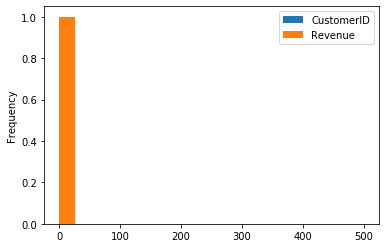

In [413]:
trend = customer_revenue_.reset_index().sample()
trend.plot.hist(range = (0,500),bins = 20)

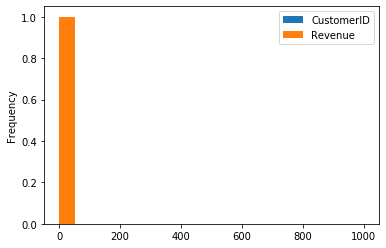

In [414]:
trend.plot.hist(range = (0,1000),bins = 20)

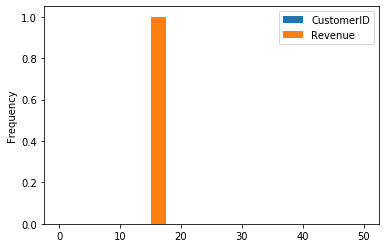

In [415]:
trend.plot.hist(range = (0,50),bins = 20)

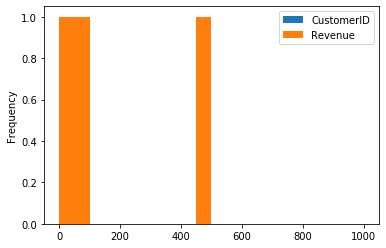

In [416]:
trend_ = customer_revenue_.reset_index()[:3]
trend_.plot.hist(range = (0,1000),bins = 20)

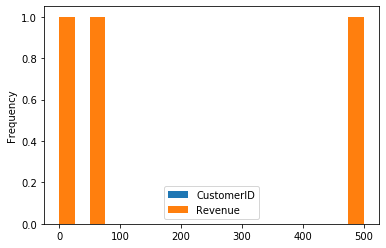

In [417]:
trend_.plot.hist(range = (0,500),bins = 20)

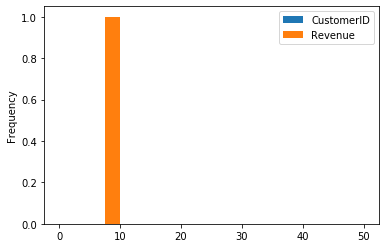

In [418]:
trend_.plot.hist(range = (0,50),bins = 20)

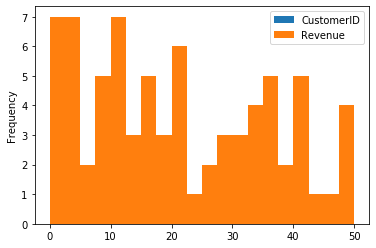

In [419]:
trendx = customer_revenue_.reset_index()[3:]
trendx.plot.hist(range = (0,50),bins = 20)

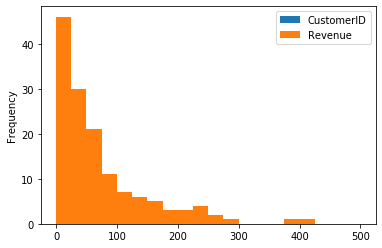

In [420]:
trendx.plot.hist(range = (0,500),bins = 20)

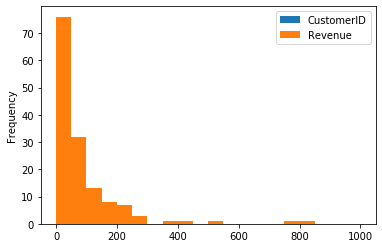

In [421]:
trendx.plot.hist(range = (0,1000),bins = 20)

All of the above three histograms show positive skewn and that when selected any item randomly their Revenue is below the range of 500 thus falling in the low value segment.

# Please submit your completed notebook in .IPYNB and .HTML formats via Canvas

Worked on this notebook with Josue Molina, Katherine Garrison and Tanvi Shah